In [31]:
%load_ext autoreload
%autoreload 2

# Edit PYTHONPATH
import sys,os,os.path
sys.path.append(os.path.expanduser('~/git'))

import numpy as np
import os
from BinaryClassification.crf_models.CRFPostprocessModel import CRFPostprocessModel
from SectionPreprocess import SectionPreprocess
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from division_plot import *
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
crf = CRFPostprocessModel.load('classifiers/crf_i386.pkl')

In [33]:
test_folder="/Users/pietro/Downloads/Firmware"
preprocessor = SectionPreprocess(ground_truth=False)
paths = [f_path.path for f_path in os.scandir(test_folder)]
paths, X = preprocessor.preprocess(paths)

joint_0_ur10_fw.elf.bin
CPU times: user 192 ms, sys: 9.88 ms, total: 202 ms
Wall time: 201 ms


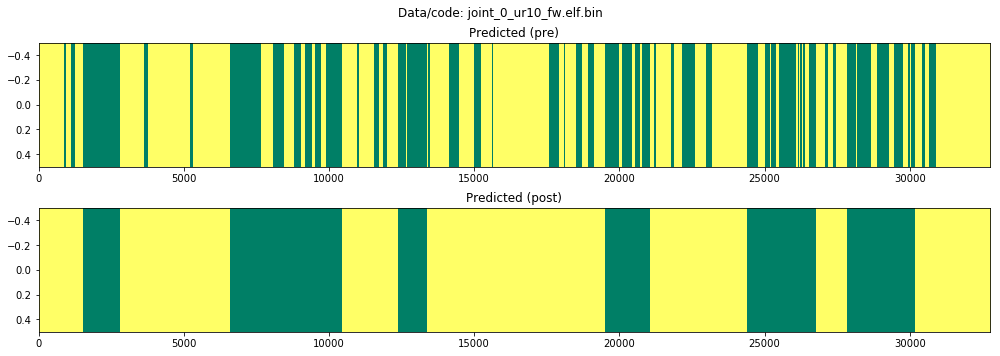

In [34]:
%%time

for path, x in zip(paths, X):
    bin_name = path.split('/')[-1]
    print(bin_name)
    
    fig = plt.figure(figsize=(14, 5))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    predicted_bytes_pre = crf.predict([x])[0]
    predicted_bytes_post = crf.postprocess_prediction(predicted_bytes_pre)
    
    plot_barcode(predicted_bytes_pre, ax1)
    plot_barcode(predicted_bytes_post, ax2)
    
    ax1.set_title('Predicted (pre)')
    ax2.set_title('Predicted (post)')
    fig.suptitle('Data/code: {}'.format(bin_name))
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)